In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('Housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [63]:
data.dropna(inplace=True)

<Axes: ylabel='ocean_proximity'>

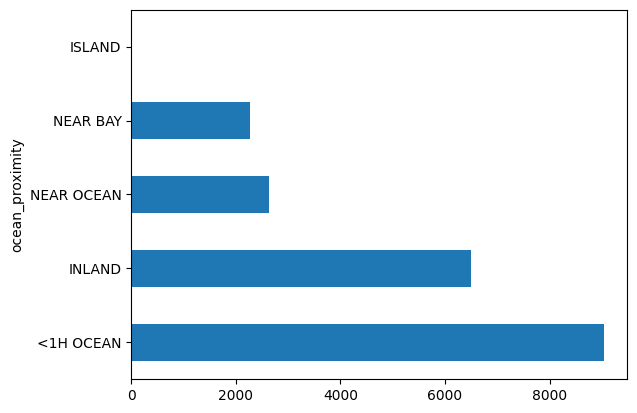

In [64]:
data['ocean_proximity'].value_counts().plot(kind='barh')

# Since we can see the dependency of oceanproximity on house prices, let us do one-hot encoding instead of label encoding.

In [65]:
data = data.join(pd.get_dummies(data.ocean_proximity))

In [66]:
data.drop(["ocean_proximity"],inplace=True,axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

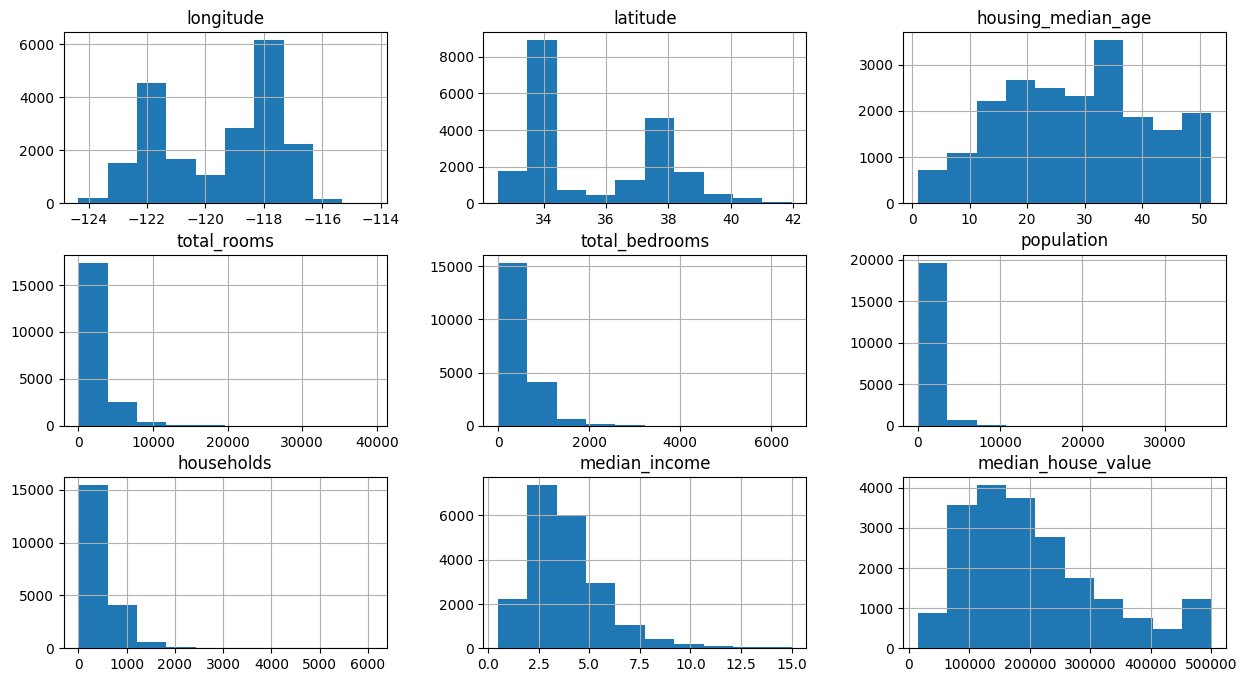

In [67]:
data.hist(figsize=(15,8))

<Axes: >

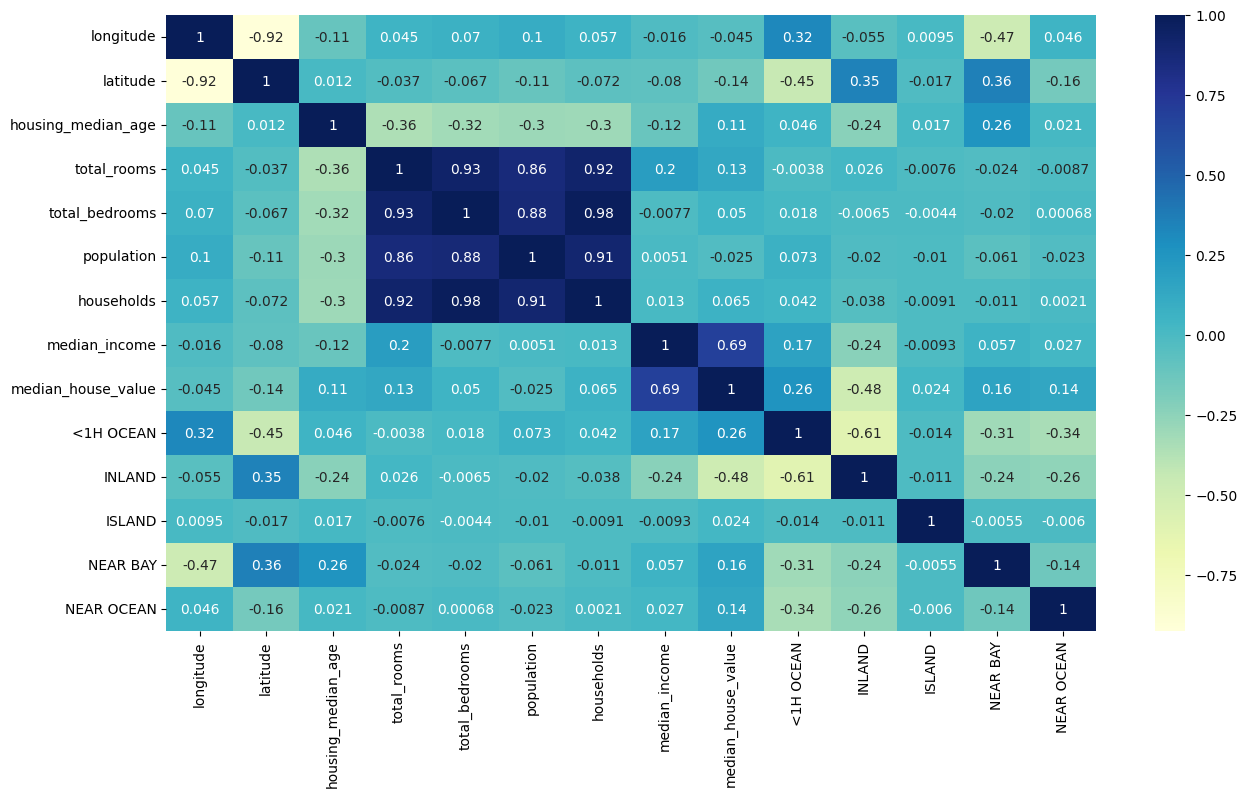

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

# After Normalization

In [69]:
data['total_rooms'] = np.log(data['total_rooms']+1)
data['total_bedrooms'] = np.log(data['total_bedrooms']+1)
data['population'] = np.log(data['population']+1)
data['households'] = np.log(data['households']+1)

## Here i have added 1 to all logs to avoid nulls and infinities, since in the time of model building ive got infinte values

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

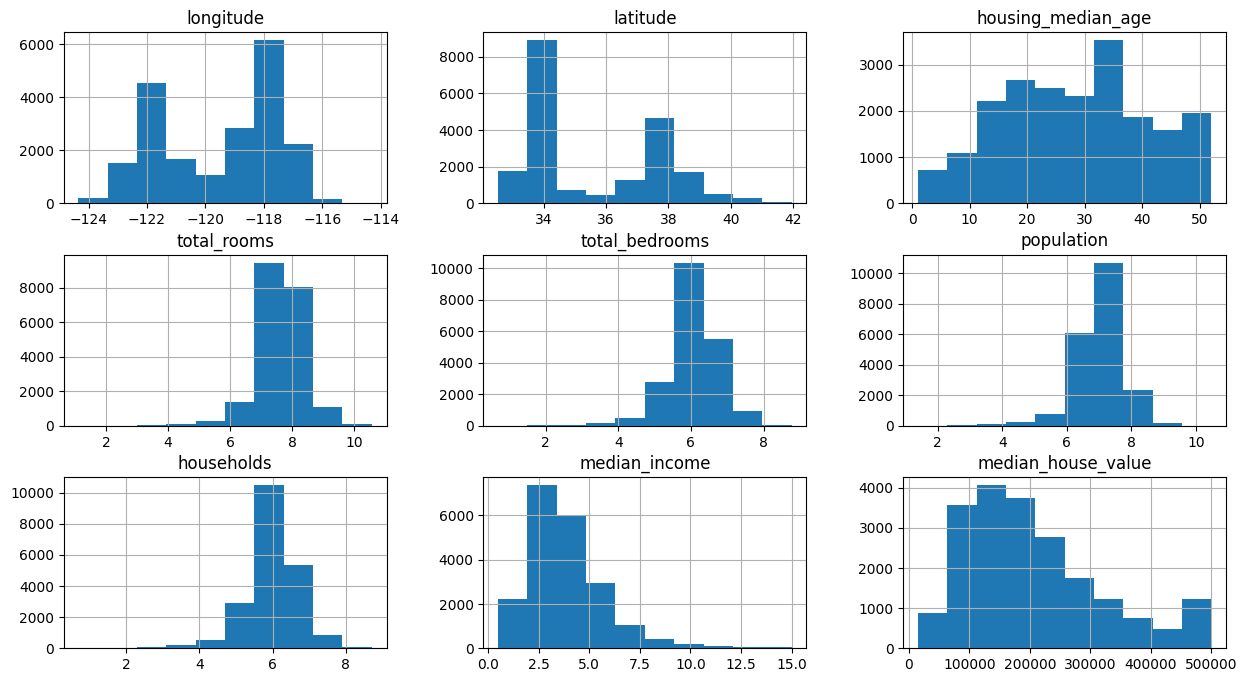

In [70]:
data.hist(figsize=(15,8))

<Axes: >

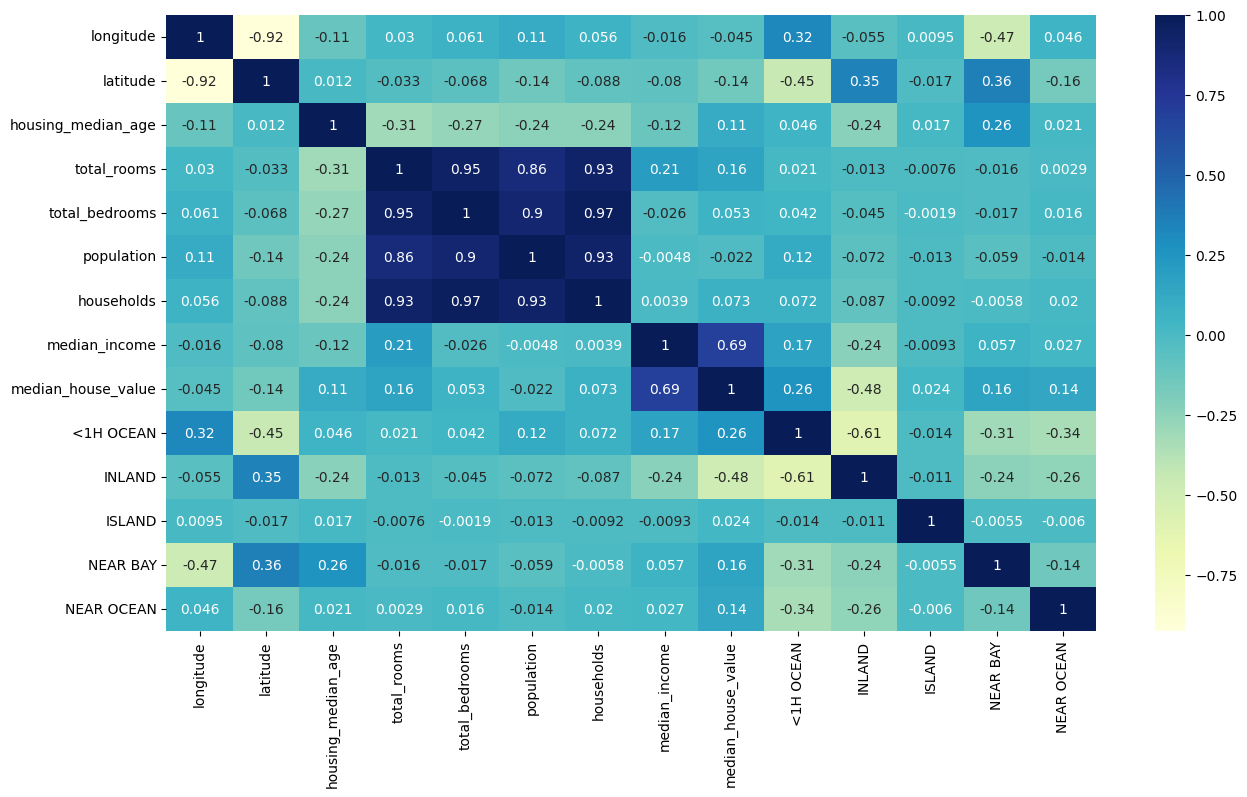

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

# Since we have the latitude and longitude data let us geologically observe the pricing of the houses targeting ocean proximity.

<Axes: xlabel='latitude', ylabel='longitude'>

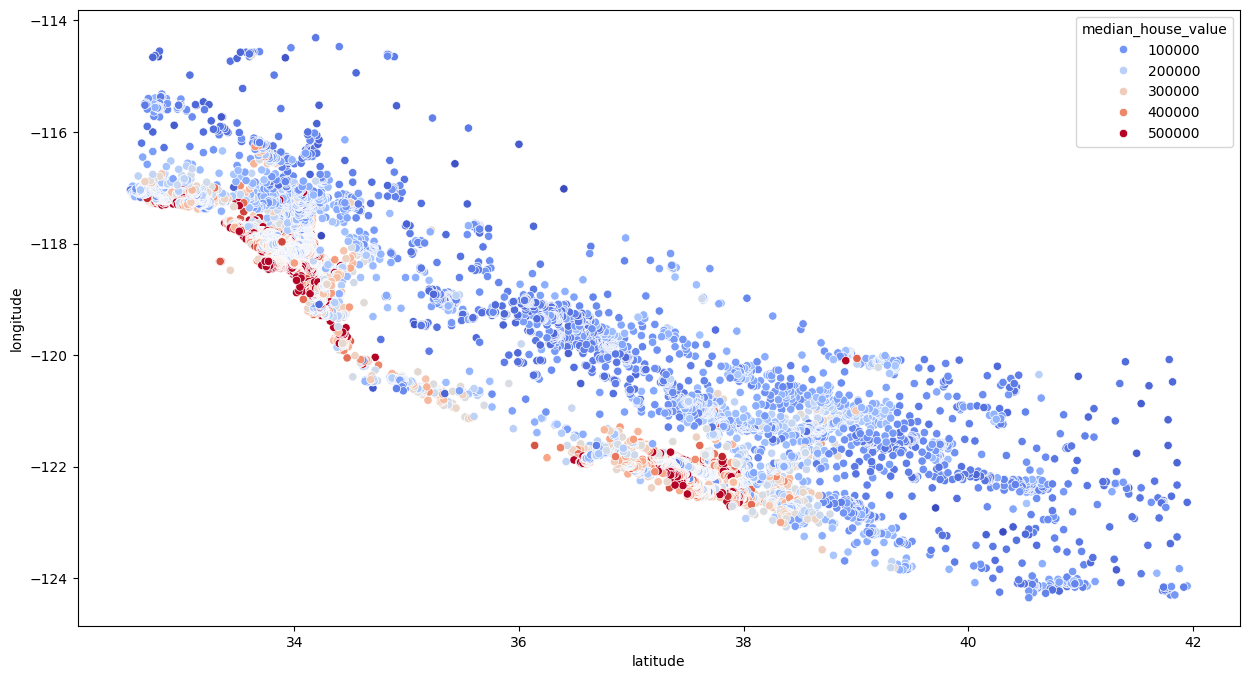

In [72]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=data,hue='median_house_value',palette='coolwarm')

# From the above scatter plot we can obsever that houses near to ocean are expensive.

# now let us find out the total bedrooms in the total rooms to extract more data.

In [73]:
data['bedrooms_ratio'] = data['total_rooms'] / data['total_bedrooms']
data['households_ratio'] = data['total_rooms'] / data['households']

<Axes: >

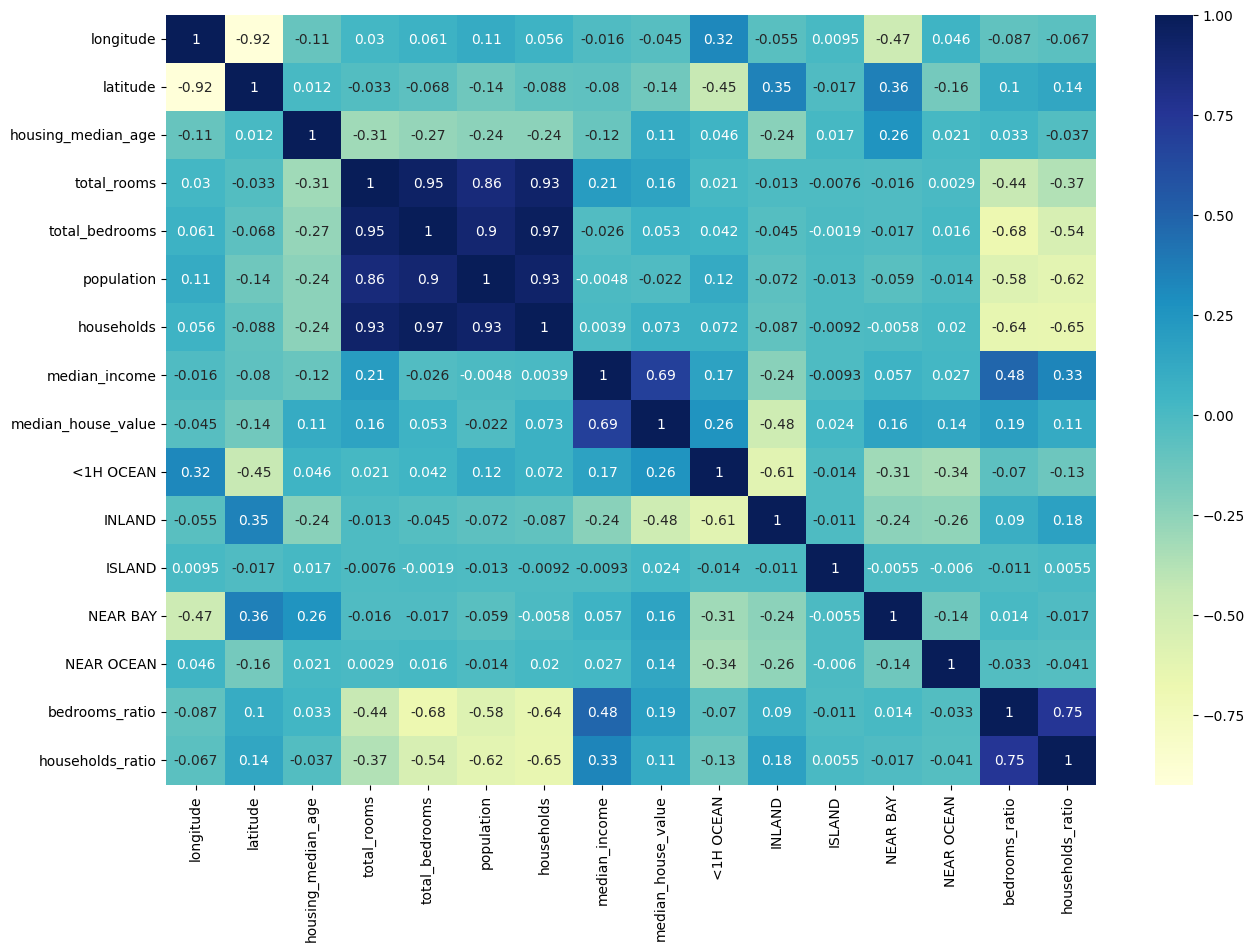

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

# There are some interesting correlations between rooms, bedrooms and house price.

# Machine Learning

In [75]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']
x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

# Lets Scale the data

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_s,y_train)

LinearRegression()

In [81]:
lr.score(x_test_s,y_test)

0.6657622303153024

# We got an accuracy of 66% with Linear Regression model.

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
Rforest = RandomForestRegressor()
Rforest.fit(x_train_s,y_train)

RandomForestRegressor()

In [83]:
Rforest.score(x_test_s,y_test)

0.7755257001780441

# We Got 77.5% accuracy with Random Forest Regressor